#### decomposition of periodic function given samples in $[-\pi, \pi)$

In [1]:
using PyPlot

In [135]:
x = linspace(-π, π, 256);
coeff_0 = 5 * rand(3);
coeff_1 = 5 * rand(3);
offset = 2 * rand();
noise = 0.3 * randn(length(x))

cs = map(pack -> pack[2] * cos(pack[1] * x), enumerate(coeff_0))
ss = map(pack -> pack[2] * sin(pack[1] * x), enumerate(coeff_1))
y = reduce((x, xs) -> x + xs, cs) + reduce((x, xs) -> x + xs, ss) + offset + noise;

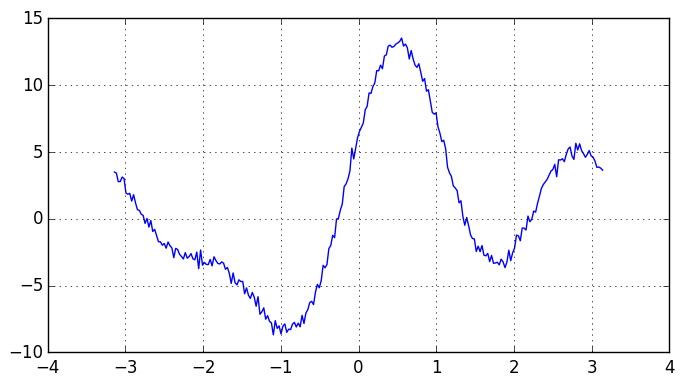

In [136]:
figure(figsize=(7, 4))
plot(x, y);
grid();
tight_layout();

###### solution \#0  
suppose we know $f(x) = c + \sum_{k=1}^{3} a_k \cdot cos(k \cdot x) + \sum_{k=1}^{3} b_k \cdot sin(k \cdot x)$  
question becomes how to get c, $a_k$, $b_k$ from samples  
GLM can be used

In [137]:
# a naive GLM implementation
A = [ones(length(x)) cos(x) cos(2*x) cos(3*x) sin(x) sin(2*x) sin(3*x)];
result = pinv(A) * y;

@printf("for (offset, a_1, a_2, a_3, b_1, b_2, b_3)\n")
@printf("GLM gets      (%.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f)\n", result...)
@printf("actual params (%.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f)\n", offset, 
        coeff_0..., coeff_1...)

for (offset, a_1, a_2, a_3, b_1, b_2, b_3)
GLM gets      (0.704, 1.310, 4.242, 0.016, 4.654, 3.652, 3.632)
actual params (0.720, 1.269, 4.228, 0.010, 4.635, 3.657, 3.625)


#### solution \#1  
fourier series, projection to complete orthogonal basis  
$f(x) = \frac{c}{2} + \sum_{k=1}^{\inf} a_k \cdot cos(k \cdot x) + \sum_{k=1}^{\inf} b_k \cdot sin(k \cdot x)$  
because  
$\int_{-\pi}^{\pi} sin(mx) sin(nx) dx = \int_{-\pi}^{\pi} \frac{cos((m-n)x) - cos((m+n)x)}{2} = \pi \delta_{mn}$  
$\int_{-\pi}^{\pi} cos(mx) cos(nx) dx = \int_{-\pi}^{\pi} \frac{cos((m+n)x) + cos((m-n)x)}{2} = \pi \delta_{mn}$  
$\int_{-\pi}^{\pi} sin(mx) cos(nx) dx = \int_{-\pi}^{\pi} \frac{sin((m+n)x) + sin((m-n)x)}{2} = 0$  
$\int_{-\pi}^{\pi} sin(x) dx = 0$  
$\int_{-\pi}^{\pi} cos(x) dx = 0$  
we get  
$c = \frac{\int_{-\pi}^{\pi} f(x) dx}{\pi}$  
$a_k = \frac{\int_{-\pi}^{\pi} f(x) cos(k \cdot x) dx}{\pi}$  
$b_k = \frac{\int_{-\pi}^{\pi} f(x) sin(k \cdot x) dx}{\pi}$

In [138]:
# naive numerical integration
function integrate(f)
    return sum(f(x[2:length(x)]) .* y[2:length(x)] .* diff(x))
end

funcs = [t->1, t->cos(t), t->cos(2t), t->cos(3t), t->sin(t), t->sin(2t), t->sin(3t)];
result = map(f -> integrate(f) / π, funcs)

@printf("for (c, a_1, a_2, a_3, b_1, b_2, b_3)\n")
@printf("fourier gets  (%.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f)\n", result...)
@printf("actual params (%.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f)\n", 2 * offset, 
        coeff_0..., coeff_1...)

for (c, a_1, a_2, a_3, b_1, b_2, b_3)
fourier gets  (1.409, 1.309, 4.242, 0.015, 4.654, 3.652, 3.632)
actual params (1.440, 1.269, 4.228, 0.010, 4.635, 3.657, 3.625)


#### plot superposition

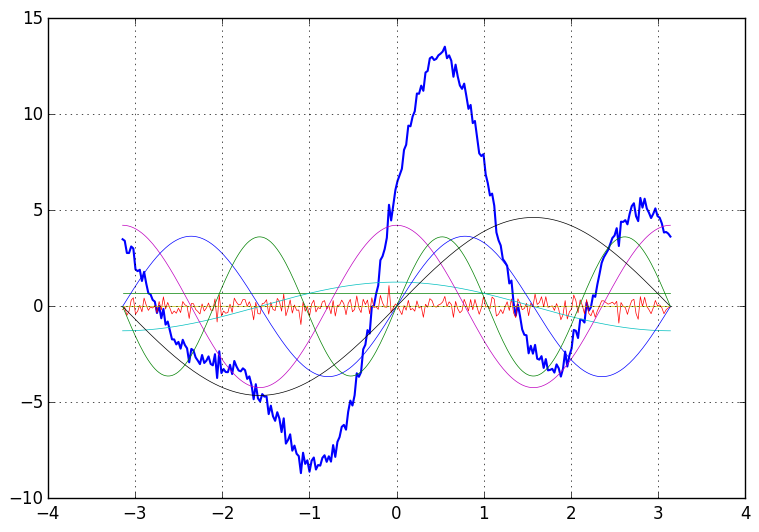

In [141]:
figure(figsize=(9, 6))
grid("on")
hold("on")

plot(x, y, linewidth=1.5)
plot(x, offset * ones(length(x)), "-", linewidth=0.5)
plot(x, noise, linewidth=0.5)

for ys in cs
    plot(x, ys, "-", linewidth=0.5)
end

for ys in ss
    plot(x, ys, "-", linewidth=0.5)
end

#### TODO: use FFT